# Statistics Project 2

### Description
In 2013, students of the Statistics class at FSEV UK were asked to invite their friends to participate in this survey.

The data file (responses.csv) consists of 1010 rows and 150 columns (139 integers and 11 categorical).

For convenience, the original variable names were shortened in the data file.

See the columns.csv file if you want to match the data with the original names.

The data contain missing values.
The survey was presented to participants in both electronic and written form.
The original questionnaire was in Slovak language and was later translated into English.
All participants were of Slovakian nationality, aged between 15-30.
For this Project we are considering 2 sections of data –  Health Habits and Spending Habits

Health Habits - I live a very healthy lifestyle. Here Strongly disagree 1-2-3-4-5 Strongly agree
Spending Habits - I save all the money I can.: Strongly disagree 1-2-3-4-5 Strongly agree
The Agenda is to find whether Spending Habits and Healthy Lifestyle is related to Gender and Place or not.


 –
Is saving money (finances) gender dependant?
Is there any differences in money saving (finances) between people from city or village?
Do Women have a Healthier Lifestyle than Men?
Are Village People Healthier than City People?
Perform the required statistical tests to validate/reject the Hypothesis in above step.
State your insights and conclusions.
 

Please Note:

Request  to submit .html and .ipynb version of Python notebook in Olympus.

There is no need to add .html in Github repository (.ipynb file will suffice in Github).

### Step 1: Load the data and extract the relevant columns.
* Hint – Relevant Columns will be Finances, Gender, Village-Town and Healthy Eating.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

df = pd.read_csv("responses.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [2]:
# df.describe()

In [3]:
df1 = df[['Healthy eating', 'Finances', 'Gender', 'Village - town']]

### Step 2: Explore the data and understand how the data is distributed
* Is there any outlier or missing value? And Share your insights.

In [4]:
df1.isna().sum()

Healthy eating    3
Finances          3
Gender            6
Village - town    4
dtype: int64

In [5]:
df1 = df1.fillna(df1.mode().iloc[0])

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Healthy eating    1010 non-null float64
Finances          1010 non-null float64
Gender            1010 non-null object
Village - town    1010 non-null object
dtypes: float64(2), object(2)
memory usage: 31.6+ KB


In [7]:
df1['Gender'] = df1['Gender'].astype('category')
df1['Village - town'] = df1['Village - town'].astype('category')

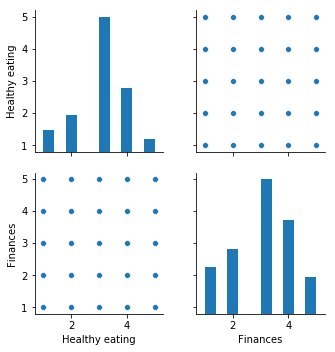

In [8]:
sns.pairplot(df1)

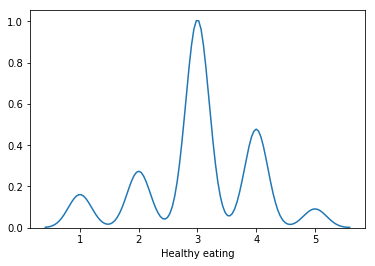

In [9]:
sns.distplot(df1['Healthy eating'], hist=False)

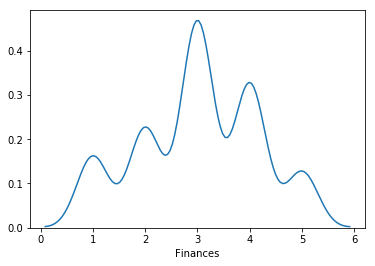

In [10]:
sns.distplot(df1['Finances'], hist=False)

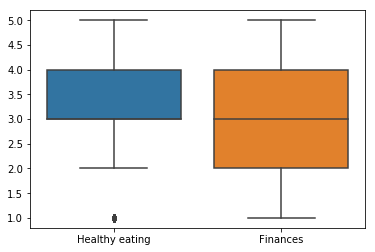

In [11]:
sns.boxplot(data=df1)

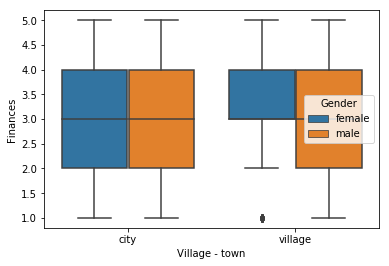

In [12]:
sns.boxplot(data=df1, x='Village - town', y='Finances', hue='Gender')

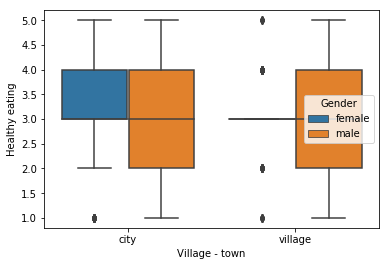

In [13]:
sns.boxplot(data=df1, x='Village - town', y='Healthy eating', hue='Gender')

* "Healthy eating" is left skewed and "Finances" is normally distributed
* There are missing values which have been replaced with Mode values

Analysis on the outliers:
    * Women in village are cautious in "Spending Habits" as they rarely chose "Strongly Disagree"
    * Men in city are concerned about their health  since most of them avoided "Strongly Disagree" in "Health Habits"
    * Women in village are conscious of their "Health Habits" as most of them have selected "Agree"

### Step 3: Create Hypothesis on the following questions
* Is saving money (finances) gender dependant?
* Is there any differences in money saving (finances) between people from city or village?
* Do Women have a Healthier Lifestyle than Men?
* Are Village People Healthier than City People?

#### Is saving money (finances) gender dependant?

Null hypothesis: There is no difference in money saving based on gender

Alternative hypothesis: There is a significant difference in money saving based on gender

Considering $\alpha$ = 0.05

In [14]:
a = 0.05
fin_gen = pd.crosstab(df1['Gender'], df1['Finances'])

chi, p_value, dof, exp_freq = stats.chi2_contingency(fin_gen)

print(f'Chi-square {chi} p-value {p_value} DOF {dof}')

if p_value > a:
    print(f'Since p-value {p_value} is significantly greater than {a}, we failed to reject the null hypothesis')
    print('There is no difference in money saving based on gender')
else:
    print(f'Since p-value {p_value} not significantly greater than {a}, we reject the null hypothesis')
    print('There is a significant difference in money saving based on gender')

Chi-square 5.328890527727397 p-value 0.25518454225298753 DOF 4
Since p-value 0.25518454225298753 is significantly greater than 0.05, we failed to reject the null hypothesis
There is no difference in money saving based on gender


#### Is there any differences in money saving (finances) between people from city or village?

Null hypothesis: There is no difference in money saving between people from city and village.

Alternative hypothesis: There is a significant difference in money saving between people from city and village.

Considering $\alpha$ = 0.05

In [15]:
a = 0.05
fin_loc = pd.crosstab(df1['Village - town'], df1['Finances'])

chi, p_value, dof, exp_freq = stats.chi2_contingency(fin_loc)

print(f'Chi-square {chi} p-value {p_value} DOF {dof}')

if p_value > a:
    print(f'Since p-value {p_value} is significantly greater than {a}, we failed to reject the null hypothesis')
    print('There is no difference in money saving between people from city and village')
else:
    print(f'Since p-value {p_value} not significantly greater than {a}, we reject the null hypothesis')
    print('There is a significant difference in money saving between people from city and village')

Chi-square 13.336002693956441 p-value 0.009745541835991274 DOF 4
Since p-value 0.009745541835991274 not significantly greater than 0.05, we reject the null hypothesis
There is a significant difference in money saving between people from city and village


#### Do Women have a Healthier Lifestyle than Men?

Null hypothesis: There is no difference in Lifestyles lifestyle with respect to health between Women and Men

Alternative hypothesis: Women live a Healthier Lifestyle than Men
Considering $\alpha$ = 0.05

In [16]:
a = 0.05
hls = df1[df1['Healthy eating']>=4]

wom_men_ls = pd.crosstab(hls['Gender'], hls['Healthy eating'])

chi, p_value, dof, exp_freq = stats.chi2_contingency(wom_men_ls)

print(f'Chi-square {chi} p-value {p_value} DOF {dof}')

if p_value > a:
    print(f'Since p-value {p_value} is significantly greater than {a}, we failed to reject the null hypothesis')
    print('There is no difference in Lifestyles lifestyle with respect to health between Women and Men')
else:
    print(f'Since p-value {p_value} not significantly greater than {a}, we reject the null hypothesis')
    print('Women live a Healthier Lifestyle than Men')

Chi-square 4.45133452312021 p-value 0.03487398376152508 DOF 1
Since p-value 0.03487398376152508 not significantly greater than 0.05, we reject the null hypothesis
Women live a Healthier Lifestyle than Men


#### Are Village People Healthier than City People?

Null hypothesis: There is No difference in lifestyle with respect to health between people who live in Village and those in City

Alternative hypothesis: People in village live a Healthier Lifestyle than the people in city
Considering $\alpha$ = 0.05

In [17]:
a = 0.05
vill_city_ls = pd.crosstab(hls['Village - town'], hls['Healthy eating'])

chi, p_value, dof, exp_freq = stats.chi2_contingency(vill_city_ls)

print(f'Chi-square {chi} p-value {p_value} DOF {dof}')

if p_value > a:
    print(f'Since p-value {p_value} is significantly greater than {a}, we failed to reject the null hypothesis')
    print('There is No difference in lifestyle with respect to health between people who live in Village and those in City')
else:
    print(f'Since p-value {p_value} not significantly greater than {a}, we reject the null hypothesis')
    print('People in village live a Healthier Lifestyle than the people in city')

Chi-square 0.2016414945342085 p-value 0.6533991286819472 DOF 1
Since p-value 0.6533991286819472 is significantly greater than 0.05, we failed to reject the null hypothesis
There is No difference in lifestyle with respect to health between people who live in Village and those in City
